In [3]:
import pandas as pd

# Загрузка данных из Excel файла
df = pd.read_excel('/content/Raisin_Dataset.xlsx')

# Вывод первых нескольких строк датафрейма
print(df.head())

# Статистическая информация
print(df.describe())

# Названия столбцов
print("Названия столбцов:", df.columns)

# Названия строк (индексы)
print("Названия строк:", df.index)

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  
                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.035121        49.988902      0.090318   
min     25387.000000       225.629541       143.710872      0.348730   
25%

Class
Kecimen    450
Besni      450
Name: count, dtype: int64


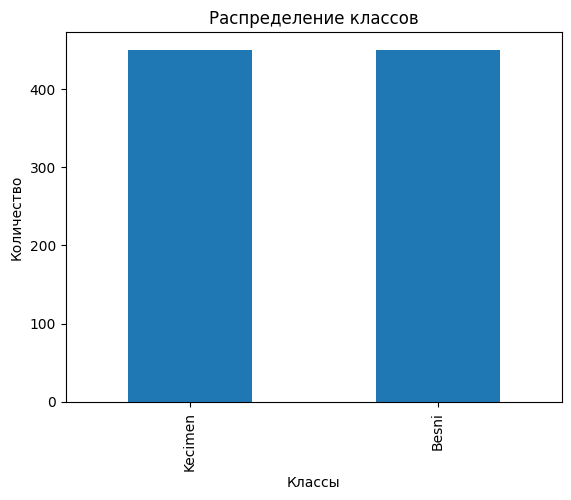

In [5]:
import matplotlib.pyplot as plt

print(df['Class'].value_counts())

# Построение гистограммы распределения классов
df['Class'].value_counts().plot(kind='bar')

# Добавим подписи осей и заголовок
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.title('Распределение классов')

# Показать гистограмму
plt.show()

In [7]:
import numpy as np

numerical_features = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']
# Вычисляем корреляционную матрицу
corr_matrix = df[numerical_features].corr().abs()

# Задаем порог корреляции (например, 0.9)
threshold = 0.9

# Ищем пары признаков с корреляцией выше порога
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Находим столбцы, которые нужно удалить
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

print(f"Признаки с высокой корреляцией (>{threshold}): {to_drop}")

# Удаляем признаки с высокой корреляцией
df_reduced = df.drop(columns=to_drop)

print(f"Оставшиеся признаки: {df_reduced.columns}")

Признаки с высокой корреляцией (>0.9): ['MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'Perimeter']
Оставшиеся признаки: Index(['Area', 'Eccentricity', 'Extent', 'Class'], dtype='object')


LogisticRegression

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Подготовка данных
X = df.drop(columns=['Class'])
y = df['Class']

# Разделение данных на учебные и тестовые (80% на обучение, 20% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных (это улучшает работу некоторых моделей, таких как логистическая регрессия)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test_scaled)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Подробный отчет о классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

       Besni       0.83      0.87      0.85        86
     Kecimen       0.88      0.84      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Подготовка данных
# Все столбцы, кроме 'Class' — это наши признаки (features)
X = df_reduced.drop(columns=['Class'])  # X — все признаки
y = df_reduced['Class']  # y — целевая переменная (класс изюма)

# Разделение данных на учебные и тестовые (80% на обучение, 20% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных (это улучшает работу некоторых моделей, таких как логистическая регрессия)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test_scaled)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Подробный отчет о классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

       Besni       0.85      0.90      0.87        86
     Kecimen       0.90      0.85      0.87        94

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



RandomForest

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Создаем и обучаем модель RandomForest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred_rf = rf_model.predict(X_test_scaled)

# Оценка точности модели
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'RandomForest Accuracy: {accuracy_rf:.2f}')

# Подробный отчет о классификации
print("RandomForest Classification Report:")
print(classification_report(y_test, y_pred_rf))

RandomForest Accuracy: 0.86
RandomForest Classification Report:
              precision    recall  f1-score   support

       Besni       0.87      0.84      0.85        86
     Kecimen       0.86      0.88      0.87        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



In [9]:
from sklearn.ensemble import RandomForestClassifier

# Создаем и обучаем модель RandomForest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred_rf = rf_model.predict(X_test_scaled)

# Оценка точности модели
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'RandomForest Accuracy: {accuracy_rf:.2f}')

# Подробный отчет о классификации
print("RandomForest Classification Report:")
print(classification_report(y_test, y_pred_rf))

RandomForest Accuracy: 0.86
RandomForest Classification Report:
              precision    recall  f1-score   support

       Besni       0.88      0.83      0.85        86
     Kecimen       0.85      0.89      0.87        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



LDA

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Подготовка данных
X = df.drop(columns=['Class'])
y = df['Class']

# Разделение данных на учебные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred = lda.predict(X_test_scaled)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Подробный отчет о классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

       Besni       0.84      0.88      0.86        86
     Kecimen       0.89      0.85      0.87        94

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



In [11]:
# Подготовка данных
X = df_reduced .drop(columns=['Class'])
y = df_reduced ['Class']

# Разделение данных на учебные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred = lda.predict(X_test_scaled)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Подробный отчет о классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

       Besni       0.86      0.81      0.84        86
     Kecimen       0.84      0.88      0.86        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180

